In [52]:
# import toolkit
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd

In [53]:
# import sentimental data
amazon_df = pd.read_csv('amazon_df.csv')
gme_df = pd.read_csv('gme_df.csv')
kodak_df = pd.read_csv('kodak_df.csv')
facebook_df = pd.read_csv('fb_df.csv')
apple_df = pd.read_csv('new_data/aapl_df.csv')
baba_df = pd.read_csv('new_data/baba_df.csv')
goog_df = pd.read_csv('new_data/goog_df.csv')
jnj_df = pd.read_csv('new_data/jnj_df.csv')
pfe_df = pd.read_csv('new_data/pfe_df.csv')
tsla_df = pd.read_csv('new_data/tsla_df.csv')

In [54]:
# renaming columns
gme_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
kodak_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
facebook_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
goog_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
apple_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
baba_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
jnj_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
pfe_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
tsla_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)

# dropping columns


gme_df.drop(columns=['Unnamed: 0'], inplace=True)
kodak_df.drop(columns=['Unnamed: 0'], inplace=True)
facebook_df.drop(columns=['Unnamed: 0'], inplace=True)
apple_df.drop(columns=['Unnamed: 0'], inplace=True)
goog_df.drop(columns=['Unnamed: 0'], inplace=True)
baba_df.drop(columns=['Unnamed: 0'], inplace=True)
jnj_df.drop(columns=['Unnamed: 0'], inplace=True)
pfe_df.drop(columns=['Unnamed: 0'], inplace=True)
tsla_df.drop(columns=['Unnamed: 0'], inplace=True)

In [55]:
# import price data
gme_price_df = pd.read_csv('price/GME_1.csv')
kodak_price_df = pd.read_csv('price/KODK_1.csv')
facebook_price_df = pd.read_csv('price/FB_1.csv')
apple_price_df = pd.read_csv('price/AAPL.csv')
baba_price_df = pd.read_csv('price/BABA.csv')
goog_price_df = pd.read_csv('price/GOOG.csv')
jnj_price_df = pd.read_csv('price/JNJ.csv')
pfe_price_df = pd.read_csv('price/PFE.csv')
tsla_price_df = pd.read_csv('price/TSLA.csv')

In [56]:
# merging DB

gme_df = pd.merge(gme_df, gme_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
kodak_df = pd.merge(kodak_df, kodak_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
facebook_df = pd.merge(facebook_df, facebook_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
apple_df = pd.merge(apple_df, apple_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
baba_df = pd.merge(baba_df, baba_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
goog_df = pd.merge(goog_df, goog_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
jnj_df = pd.merge(jnj_df, jnj_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
pfe_df = pd.merge(pfe_df, pfe_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
tsla_df = pd.merge(tsla_df, tsla_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)


print(kodak_df.shape)
print(gme_df.shape)
print(facebook_df.shape)

(862, 11)
(653, 11)
(726, 11)
(855, 11)


In [57]:
facebook_df.drop(columns=['Date'],inplace=True)
kodak_df.drop(columns=['Date'],inplace=True)
gme_df.drop(columns=['Date'],inplace=True)
apple_df.drop(columns=['Date'],inplace=True)
goog_df.drop(columns=['Date'],inplace=True)
baba_df.drop(columns=['Date'],inplace=True)
jnj_df.drop(columns=['Date'],inplace=True)
pfe_df.drop(columns=['Date'],inplace=True)
tsla_df.drop(columns=['Date'],inplace=True)

In [58]:
from sklearn.impute import KNNImputer, SimpleImputer

In [59]:
facebook_df['retorno'] = facebook_df['Close'].pct_change()
kodak_df['retorno'] = kodak_df['Close'].pct_change()
gme_df['retorno'] = gme_df['Close'].pct_change()
apple_df['retorno'] = apple_df['Close'].pct_change()
goog_df['retorno'] = goog_df['Close'].pct_change()
baba_df['retorno'] = baba_df['Close'].pct_change()
jnj_df['retorno'] = jnj_df['Close'].pct_change()
pfe_df['retorno'] = pfe_df['Close'].pct_change()
tsla_df['retorno'] = tsla_df['Close'].pct_change()

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer([('imputer',  KNNImputer(n_neighbors=1),['Open','Low','Close', 'Volume']),('MinMax', StandardScaler(),['Open','Low','Close', 'Volume', 'Positive', 'Negative','Neutral','Sentimental Score'])], remainder='passthrough')
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

### RNN COM UM ATIVO

In [61]:
apple_df = apple_df.dropna().reset_index()#1
gme_df = gme_df.dropna().reset_index() #3
kodak_df = kodak_df.dropna().reset_index() #4
facebook_df = facebook_df.dropna().reset_index()#5
goog_df = goog_df.dropna().reset_index() #6
jnj_df = jnj_df.dropna().reset_index() #7
pfe_df = pfe_df.dropna().reset_index() #8
tsla_df = tsla_df.dropna().reset_index() #9
baba_df = baba_df.dropna().reset_index() #10

In [62]:
y_1 = apple_df['retorno']
y_2 = amazon_df['retorno']
y_3 = gme_df['retorno']
y_4 = kodak_df['retorno']
y_5 = facebook_df['retorno']
y_6 = goog_df['retorno']
y_7 = jnj_df['retorno']
y_8 = pfe_df['retorno']
y_9 = tsla_df['retorno']
y_10 = baba_df['retorno']

In [63]:
X_1 = apple_df.drop(columns=['retorno'])
X_2 = amazon_df.drop(columns=['retorno'])
X_3 = gme_df.drop(columns=['retorno'])
X_4 = kodak_df.drop(columns=['retorno'])
X_5 = facebook_df.drop(columns=['retorno'])
X_6 = goog_df.drop(columns=['retorno'])
X_7 = jnj_df.drop(columns=['retorno'])
X_8 = pfe_df.drop(columns=['retorno'])
X_9 = tsla_df.drop(columns=['retorno'])
X_10 = baba_df.drop(columns=['retorno'])

In [64]:
X_1 = my_pipeline.fit_transform(X_1)
X_2 = my_pipeline.fit_transform(X_2)
X_3 = my_pipeline.fit_transform(X_3)
X_4 = my_pipeline.fit_transform(X_4)
X_5 = my_pipeline.fit_transform(X_5)
X_6 = my_pipeline.fit_transform(X_6)
X_7 = my_pipeline.fit_transform(X_7)
X_8 = my_pipeline.fit_transform(X_8)
X_9 = my_pipeline.fit_transform(X_9)
X_10 = my_pipeline.fit_transform(X_10)

In [65]:
print(y_1.shape)
print(X_1.shape)
print(y_2.shape)
print(X_2.shape)
print(y_3.shape)
print(X_3.shape)
print(y_4.shape)
print(X_4.shape)
print(y_5.shape)
print(X_5.shape)
print(y_6.shape)
print(X_6.shape)
print(y_7.shape)
print(X_7.shape)
print(y_8.shape)
print(X_8.shape)
print(y_9.shape)
print(X_9.shape)
print(y_10.shape)
print(X_10.shape)

(577,)
(577, 15)
(542,)
(542, 15)
(333,)
(333, 15)
(105,)
(105, 15)
(627,)
(627, 15)
(577,)
(577, 15)
(456,)
(456, 15)
(486,)
(486, 15)
(577,)
(577, 15)
(529,)
(529, 15)


In [66]:
X_1train = []
y_1train = []
for i in range(10, 547):
    X_1train.append(X_1[i-10:i])
    y_1train.append(y_1[i])
X_2train = []
y_2train = []
for i in range(10, 512):
    X_2train.append(X_2[i-10:i])
    y_2train.append(y_2[i])
X_3train = []
y_3train = []
for i in range(10, 303):
    X_3train.append(X_3[i-10:i])
    y_3train.append(y_3[i])
X_4train = []
y_4train = []
for i in range(10, 75):
    X_4train.append(X_4[i-10:i])
    y_4train.append(y_4[i])
X_5train = []
y_5train = []
for i in range(10, 597):
    X_5train.append(X_5[i-10:i])
    y_5train.append(y_5[i])
    
X_6train = []
y_6train = []
for i in range(10, 547):
    X_6train.append(X_6[i-10:i])
    y_6train.append(y_6[i])
X_7train = []
y_7train = []
for i in range(10, 426):
    X_7train.append(X_7[i-10:i])
    y_7train.append(y_7[i])
X_8train = []
y_8train = []
for i in range(10, 456):
    X_8train.append(X_8[i-10:i])
    y_8train.append(y_8[i])
X_9train = []
y_9train = []
for i in range(10, 547):
    X_9train.append(X_9[i-10:i])
    y_9train.append(y_9[i])
X_10train = []
y_10train = []
for i in range(10, 499):
    X_10train.append(X_10[i-10:i])
    y_10train.append(y_10[i])

In [67]:
X_1train, y_1train = np.array(X_1train), np.array(y_1train)
X_2train, y_2train = np.array(X_2train), np.array(y_2train)
X_3train, y_3train = np.array(X_3train), np.array(y_3train)
X_4train, y_4train = np.array(X_4train), np.array(y_4train)
X_5train, y_5train = np.array(X_5train), np.array(y_5train)
X_6train, y_6train = np.array(X_6train), np.array(y_6train)
X_7train, y_7train = np.array(X_7train), np.array(y_7train)
X_8train, y_8train = np.array(X_8train), np.array(y_8train)
X_9train, y_9train = np.array(X_9train), np.array(y_9train)
X_10train, y_10train = np.array(X_10train), np.array(y_10train)

In [69]:
from tensorflow.keras import models
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping
def tanise_model():
    #normalizar o x train
    model = models.Sequential()
    model.add(layers.LSTM(100, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(100, return_sequences=False, activation='tanh'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(30, activation='linear'))
    model.compile(loss='mse', 
                  optimizer=RMSprop(learning_rate=0.03), 
                  metrics=['mae'])
    
    return model

In [70]:
modelo_2 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_2 = modelo_2.fit(X_2train, y_2train, epochs = 150, batch_size = 80, callbacks=callback)

Epoch 1/150
7/7 [==============================] - 8s 64ms/step - loss: 4.5163 - mae: 1.5978
Epoch 2/150
7/7 [==============================] - 0s 56ms/step - loss: 0.0053 - mae: 0.0572
Epoch 3/150
7/7 [==============================] - 0s 49ms/step - loss: 0.0024 - mae: 0.0403
Epoch 4/150
7/7 [==============================] - 0s 60ms/step - loss: 0.0015 - mae: 0.0309
Epoch 5/150
7/7 [==============================] - 1s 64ms/step - loss: 8.1431e-04 - mae: 0.0224
Epoch 6/150
7/7 [==============================] - 1s 72ms/step - loss: 8.6183e-04 - mae: 0.0227
Epoch 7/150
7/7 [==============================] - 0s 50ms/step - loss: 5.9026e-04 - mae: 0.0185
Epoch 8/150
7/7 [==============================] - 0s 70ms/step - loss: 3.9140e-04 - mae: 0.0143
Epoch 9/150
7/7 [==============================] - 0s 66ms/step - loss: 3.7248e-04 - mae: 0.0138
Epoch 10/150
7/7 [==============================] - 0s 46ms/step - loss: 3.7232e-04 - mae: 0.0138
Epoch 11/150
7/7 [===========================

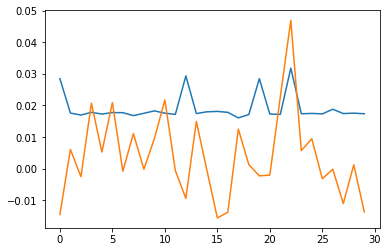

In [71]:
X_2test = []
y_2test = []
for i in range(512, len(X_2)):
    X_2test.append(X_2[i-10:i])
    y_2test.append(y_2[i])
X_2test = np.array(X_2test)
previsao_2 = modelo_2.predict(X_2test)
plt.plot(previsao_2[0])
plt.plot(y_2test)


previsao_2[0]
valores_previstos_2=array([-0.00123709, -0.00309801,  0.00097798,  0.00109722,  0.00128765,
        0.00246249, -0.00067249,  0.00336073,  0.00168929,  0.00455723,
        0.00475869, -0.00442414, -0.00167145, -0.00342615,  0.00375156,
       -0.00072974, -0.00237766, -0.00279478,  0.00104707,  0.0023252 ,
       -0.00537362, -0.00261442,  0.00412938,  0.00440552,  0.00255223,
        0.00339385, -0.00244583, -0.00498724, -0.00492568, -0.00281114],
      dtype=float32)
valores_reais_2 =[-0.014526940449806403,
 0.006027581005307203,
 -0.0025606356002577657,
 0.020669133865531597,
 0.005220349326898521,
 0.020876827345878368,
 -0.0008418264841100198,
 0.011067200346823292,
 -0.00021875366796175744,
 0.009494201556198512,
 0.02166458970792773,
 -0.0006706583687869916,
 -0.009446769888951101,
 0.014904625583759046,
 -0.000462102625423344,
 -0.015622945510225916,
 -0.013806613915329335,
 0.012474035410231954,
 0.001234069651482983,
 -0.00231428574467063,
 -0.0020900019719781726,
 0.0227237667847342,
 0.04692707191113055,
 0.005669630620418253,
 0.009422177597960824,
 -0.003234655072653414,
 -0.00021241375655556283,
 -0.0110768825099119,
 0.0011747081804083237,
 -0.013711126967133613]

In [ ]:
previsao_2

In [ ]:
modelo_1 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_1 = modelo_1.fit(X_1train, y_1train, epochs = 15, batch_size = 42)
X_1test = []
y_1test = []
for i in range(547, len(X_1)):
    X_1test.append(X_1[i-10:i])
    y_1test.append(y_1[i])
X_1test = np.array(X_1test)
previsao_1 = modelo_1.predict(X_1test)
plt.plot(previsao_1[0])
plt.plot(y_1test)

In [ ]:
modelo_2 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_2 = modelo_2.fit(X_2train, y_2train, epochs = 150, batch_size = 42, callbacks=[callback])
X_2test = []
y_2test = []
for i in range(512, len(X_2)):
    X_2test.append(X_2[i-10:i])
    y_2test.append(y_2[i])
X_2test = np.array(X_2test)
previsao_2 = modelo_2.predict(X_2test)
plt.plot(previsao_2[0])
plt.plot(y_2test)

In [ ]:
modelo_3 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_3 = modelo_3.fit(X_3train, y_3train, epochs = 150, batch_size = 43, callbacks=[callback])
X_3test = []
y_3test = []
for i in range(303, len(X_3)):
    X_3test.append(X_3[i-10:i])
    y_3test.append(y_3[i])
X_3test = np.array(X_3test)
previsao_3 = modelo_3.predict(X_3test)
plt.plot(previsao_3[0])
plt.plot(y_3test)


In [ ]:
X_1test.shape

In [ ]:
X_1test = []
y_1test = []
for i in range(547, len(X)):
    X_1test.append(X[i-10:i])
    y_1test.append(y[i])
X_1test = np.array(X_1test)
X_1test = []
y_1test = []
for i in range(547, len(X)):
    X_1test.append(X[i-10:i])
    y_1test.append(y[i])
X_1test = np.array(X_1test)
X_1test = []
y_1test = []
for i in range(547, len(X)):
    X_1test.append(X[i-10:i])
    y_1test.append(y[i])
X_1test = np.array(X_1test)
X_1test = []
y_1test = []
for i in range(547, len(X)):
    X_1test.append(X[i-10:i])
    y_1test.append(y[i])
X_1test = np.array(X_1test)
X_1test = []
y_1test = []
for i in range(547, len(X)):
    X_1test.append(X[i-10:i])
    y_1test.append(y[i])
X_1test = np.array(X_1test)
X_1test = []
y_1test = []
for i in range(547, len(X)):
    X_1test.append(X[i-10:i])
    y_1test.append(y[i])
X_1test = np.array(X_1test)
X_1test = []
y_1test = []
for i in range(547, len(X)):
    X_1test.append(X[i-10:i])
    y_1test.append(y[i])
X_1test = np.array(X_1test)
X_1test = []
y_1test = []
for i in range(547, len(X)):
    X_1test.append(X[i-10:i])
    y_1test.append(y[i])
X_1test = np.array(X_1test)
X_1test = []
y_1test = []
for i in range(547, len(X)):
    X_1test.append(X[i-10:i])
    y_1test.append(y[i])
X_1test = np.array(X_1test)
X_1test = []
y_1test = []
for i in range(547, len(X)):
    X_1test.append(X[i-10:i])
    y_1test.append(y[i])
X_1test = np.array(X_1test)

In [ ]:
fitted1

In [ ]:
X_test.shape

In [ ]:
previsao = tesla_model.predict(X_test)

In [ ]:
tesla_model.predict(X_test).shape

In [ ]:
previsao[0]

In [ ]:
plt.plot(tsla_df['retorno'])

In [ ]:
plt.plot(previsao[0])
plt.plot(y_1test)

In [ ]:
plt.plot(previsao[0])
plt.plot(y_1test)

# Valores e previsão da Apple:

Previsão = array([ 6.0000550e-03,  6.6770427e-04,  8.8357888e-03, -4.3984540e-03,
        4.0360708e-03,  5.4935301e-03,  6.8415450e-03,  8.0767460e-03,
        8.6272452e-03,  7.2241053e-03, -1.2025610e-03,  5.5446401e-03,
        6.2487684e-03,  6.1882092e-03, -2.2658715e-03, -1.3665073e-03,
        6.4451955e-03,  7.9403371e-03,  9.1592651e-03,  4.1969307e-04,
        9.2163216e-05,  1.0435515e-02,  7.1953703e-03,  9.4576534e-03,
        8.1165181e-04,  1.8875040e-03, -4.1180290e-05, -4.2155315e-04,
        4.6143681e-03,  4.1573653e-03], dtype=float32)

y_test = [-0.012154139395007313,
 0.019022166559055975,
 7.945139629006448e-05,
 0.0066719327061957046,
 0.003077161087438496,
 -0.00802325702118245,
 0.009832668763525065,
 0.024577913552578545,
 -0.006437740384699686,
 0.003933928642679829,
 0.012600841079968284,
 -0.010091711359132227,
 0.014103911108376721,
 0.012698357044814257,
 -0.002089855114387973,
 -0.0021689849869261923,
 -0.00224872980678148,
 0.012546000760933262,
 0.011500245331623304,
 0.0046211756352296796,
 0.002263416642797056,
 0.01959643299833358,
 0.01471847284778427,
 0.01795523852305836,
 -0.009199707848613237,
 0.013054977977341231,
 -0.004203711720665804,
 0.007889269132515198,
 0.024100484218248397,
 -0.004492109932034749]